### Advanced Data Transformation with Polars

The examples below use `.head()` to reduce the output to a few rows and take up less space.
If you want the full output, remove `.head()` from the code.

This notebooked is divided into sections. If your code editor supports it, you can use the **Outline** functionality to easily go to the code section you are interested in.

For more details on Polars functions, check out the Polars API reference: https://pola-rs.github.io/polars/py-polars/html/reference/index.html

In [1]:
import polars as pl

# Configure the number of characters to show for each string column
pl.Config.set_fmt_str_lengths(50)

polars.config.Config

#### CSV: Read

In [2]:
# Read a CSV file with read_csv
btc = pl.read_csv('../datasets/BTC-USD.csv')

btc.head(2)

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2019-01-01""",3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990
"""2019-01-02""",3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836


In [3]:
# Read a CSV file in lazy mode with scan_csv

btc_lazy = pl.scan_csv('../datasets/BTC-USD.csv')

In [4]:
btc_lazy

<LazyFrame [7 cols, {"Date": Utf8 … "Volume": Int64}] at 0x7F60D4946E00>

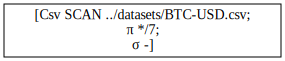

In [5]:
btc_lazy.show_graph()

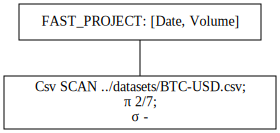

In [6]:
btc_lazy.select('Date','Volume').head(10).show_graph()

In [7]:
# Read a string with StringIO

import io

csv_string = """
Date,Open,High,Low,Close,Adj Close,Volume
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
"""

pl.read_csv(io.StringIO(csv_string))

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2020-01-01""",7194.89209,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
"""2020-01-02""",7202.55127,7212.155273,6935.27002,6985.470215,6985.470215,20802083465


In [8]:
# Load 'Date' and 'Adj Close' columns, rename them to 'date' and 'price', and load the first 4 rows

pl.read_csv('../datasets/BTC-USD.csv', 
            columns=['Date','Adj Close'],
            new_columns=['date','price'],
            n_rows=4)

date,price
str,f64
"""2019-01-01""",3843.52002
"""2019-01-02""",3943.409424
"""2019-01-03""",3836.741211
"""2019-01-04""",3857.717529


In [9]:
# We can choose a different separator, for example a tab for tab-separated data.
# For simplicity, the examples use a string, but it can be a file.

tab_separated_data = """Date\tOpen\tHigh\tLow\tClose\tAdj Close\tVolume
2020-01-01\t7194.892090\t7254.330566\t7174.944336\t7200.174316\t7200.174316\t18565664996"""

pl.read_csv(io.StringIO(tab_separated_data), separator='\t')

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2020-01-01""",7194.89209,7254.330566,7174.944336,7200.174316,7200.174316,18565664996


In [10]:
# we can specify values to interpret as null (missing) values
# for example, N/A is a missing value 

csv_string_with_null_values = """
Date,Open,High,Low,Close,Adj Close,Volume
2020-01-01,7194.892090,N/A,7174.944336,7200.174316,7200.174316,18565664996
2020-01-02,N/A,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
"""

pl.read_csv(io.StringIO(csv_string_with_null_values),
            null_values=['N/A'])

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2020-01-01""",7194.89209,null,7174.944336,7200.174316,7200.174316,18565664996
"""2020-01-02""",null,7212.155273,6935.27002,6985.470215,6985.470215,20802083465


In [11]:
# we can automatically parse the date columns

btc_with_dates = pl.read_csv('../datasets/BTC-USD.csv',
            try_parse_dates=True).head(2)

btc_with_dates

Date,Open,High,Low,Close,Adj Close,Volume
date,f64,f64,f64,f64,f64,i64
2019-01-01,3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836


In [12]:
# Polars automatically rechunks the data to improve later performance
# we can set rechunk to False if we want to rechunk the data later

pl.read_csv('../datasets/BTC-USD.csv',
            rechunk=False).head(2)

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2019-01-01""",3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990
"""2019-01-02""",3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836


#### CSV: Write

In [13]:
# I can save to csv with write_csv

btc.head(5).write_csv('btc.csv')

In [14]:
# If I don't specify a file, I can save to a variable.
# Then read the file with StringIO

csv_variable = btc.head(2).write_csv()

In [15]:
csv_variable

'Date,Open,High,Low,Close,Adj Close,Volume\n2019-01-01,3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990\n2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836\n'

In [16]:
pl.read_csv(io.StringIO(csv_variable))

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2019-01-01""",3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990
"""2019-01-02""",3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836


In [17]:
# when I work with dates, I can specify the date format
# for example, date-month-year

btc_with_dates.write_csv(date_format='%d-%m-%Y')

'Date,Open,High,Low,Close,Adj Close,Volume\n01-01-2019,3746.713379,3850.913818,3707.231201,3843.52002,3843.52002,4324200990\n02-01-2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836\n'

#### JSON: Read

In [18]:
# we read new-line delimited JSON files with read_ndjson

videogames = pl.read_ndjson('../datasets/meta_videogames_350.json')

In [19]:
videogames.select('category','title','brand').head(2)

category,title,brand
list[str],str,str
"[""Video Games"", ""Retro Gaming &amp; Microconsoles"", … ""</span></span></span>""]","""Halo - Xbox""","""by\n \n Microso"""
"[""Video Games"", ""Retro Gaming &amp; Microconsoles"", … ""</span></span></span>""]","""Final Fantasy X""","""by\n \n SquareSo"""


In [20]:
# we can also read JSON files in lazy mode with scan_ndjson

videogames_lazy = pl.scan_ndjson('../datasets/meta_videogames_350.json')

In [21]:
videogames_lazy.select('category','title','brand').head(2).collect()

category,title,brand
list[str],str,str
"[""Video Games"", ""Retro Gaming &amp; Microconsoles"", … ""</span></span></span>""]","""Halo - Xbox""","""by\n \n Microso"""
"[""Video Games"", ""Retro Gaming &amp; Microconsoles"", … ""</span></span></span>""]","""Final Fantasy X""","""by\n \n SquareSo"""


#### JSON: Write

In [22]:
# we can use write_json and write_ndjson to save to JSON files

videogames.select('category','title','brand').head(2).write_json()

'{"columns":[{"name":"category","datatype":{"List":"Utf8"},"values":[{"name":"","datatype":"Utf8","values":["Video Games","Retro Gaming &amp; Microconsoles","Xbox","Games","</span></span></span>"]},{"name":"","datatype":"Utf8","values":["Video Games","Retro Gaming &amp; Microconsoles","PlayStation 2","Games","</span></span></span>"]}]},{"name":"title","datatype":"Utf8","values":["Halo - Xbox","Final Fantasy X"]},{"name":"brand","datatype":"Utf8","values":["by\\\\n    \\\\n    Microso","by\\\\n    \\\\n    SquareSo"]}]}'

In [23]:
videogames.select('category','title','brand').head(2).write_json(row_oriented=True)

'[{"category":["Video Games","Retro Gaming &amp; Microconsoles","Xbox","Games","</span></span></span>"],"title":"Halo - Xbox","brand":"by\\\\n    \\\\n    Microso"},{"category":["Video Games","Retro Gaming &amp; Microconsoles","PlayStation 2","Games","</span></span></span>"],"title":"Final Fantasy X","brand":"by\\\\n    \\\\n    SquareSo"}]'

In [24]:
videogames.select('category','title','brand').head(2).write_ndjson()

'{"category":["Video Games","Retro Gaming &amp; Microconsoles","Xbox","Games","</span></span></span>"],"title":"Halo - Xbox","brand":"by\\\\n    \\\\n    Microso"}\n{"category":["Video Games","Retro Gaming &amp; Microconsoles","PlayStation 2","Games","</span></span></span>"],"title":"Final Fantasy X","brand":"by\\\\n    \\\\n    SquareSo"}\n'

#### Excel: Read

In [25]:
# If I don't specify the sheet name, it read the first Excel sheet

videogame_sales = pl.read_excel('../datasets/videogame_sales.xlsx')

In [26]:
videogame_sales.head(2)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
i64,str,str,i64,str,str,f64,f64,f64,f64,f64
1,"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.49,29.02,3.77,8.46,82.74
2,"""Super Mario Bros.""","""NES""",1985,"""Platform""","""Nintendo""",29.08,3.58,6.81,0.77,40.24


In [27]:
# I can specify the sheet name with sheet_name

pl.read_excel('../datasets/videogame_sales.xlsx', sheet_name='sales').head(2)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
i64,str,str,i64,str,str,f64,f64,f64,f64,f64
1,"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.49,29.02,3.77,8.46,82.74
2,"""Super Mario Bros.""","""NES""",1985,"""Platform""","""Nintendo""",29.08,3.58,6.81,0.77,40.24


In [28]:
# Polars first converts the Excel file to CSV, then reads the CSV file
# We can pass all of the parameters of read_csv in a dedicated parameter 'read_csv_options'

pl.read_excel('../datasets/videogame_sales.xlsx', 
              read_csv_options={'columns': ['Name', 'Platform'], 'new_columns': ['name', 'platform']}
              ).head(2)

name,platform
str,str
"""Wii Sports""","""Wii"""
"""Super Mario Bros.""","""NES"""


#### Excel: Write

In [31]:
videogame_sales.head(2)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
i64,str,str,i64,str,str,f64,f64,f64,f64,f64
1,"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.49,29.02,3.77,8.46,82.74
2,"""Super Mario Bros.""","""NES""",1985,"""Platform""","""Nintendo""",29.08,3.58,6.81,0.77,40.24


In [33]:
# Save the dataset on an Excel file on the worksheet 'sales'

videogame_sales.write_excel('videogame_sales.xlsx', worksheet='sales')

In [36]:
# Save the dataset on an Excel file starting from the cell B2

videogame_sales.write_excel('videogame_sales.xlsx', 
                            worksheet='sales',
                            position = 'B2')

In [40]:
# Change the style of the table

videogame_sales.write_excel('videogame_sales.xlsx', 
                            worksheet='sales',
                            table_style= 'Table Style Medium 2')

In [48]:
# Choose the data formatting for the columns
# For the Year column, we do not want to show the thousands separator
# For the NA_Sales column, we want to add the 'k' suffix to clarify the number is in thousands

videogame_sales.write_excel('videogame_sales.xlsx',
                            worksheet='sales',
                            column_formats={'Year': '0',
                                            'NA_Sales': '0"k"'
                                            })

In [55]:
# Add column totals on a row at the bottom of the table

videogame_sales.write_excel('videogame_sales.xlsx',
                            worksheet='sales',
                            column_totals=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])

In [69]:
# Add an Excel column with the % of sales in North America

videogame_sales.write_excel('videogame_sales.xlsx',
    worksheet='sales',
    formulas={'NA_Sales_%': {
        'formula': '=[NA_Sales]/[Global_Sales]',
        'insert_after': 'NA_Sales',
        }},
    column_formats={'NA_Sales_%': '0.00%'})

In [84]:
# Add an Excel column with the % of sales in North America

videogame_sales.write_excel('videogame_sales.xlsx',
    worksheet='sales',
    formulas={'NA_Sales_%': {
        'formula': '=[NA_Sales]/[Global_Sales]',
        'insert_after': 'NA_Sales',
        }},
    column_formats={'NA_Sales_%': '0.00%'},
    conditional_formats={
        "NA_Sales_%": {
            "type": "data_bar",
            "min_value": 0,
            "max_value": 1}
        })

In [85]:
#!cp videogame_sales.xlsx /mnt/c/Users/lc/OneDrive/Desktop/videogame_sales.xlsx

#### Parquet: Read

In [88]:
# Read a Parquet file with read_parquet
pokemon = pl.read_parquet('../datasets/pokemon_simplified.parquet')

pokemon.head(2)

name,type1,type2,abilities,hp,attack,defense,speed,is_legendary
str,str,str,list[str],i64,i64,i64,i64,i64
"""Bulbasaur""","""grass""","""poison""","[""Overgrow"", ""Chlorophyll""]",45,49,49,45,0
"""Ivysaur""","""grass""","""poison""","[""Overgrow"", ""Chlorophyll""]",60,62,63,60,0


In [89]:
# We can read in lazy mode with scan_parquet

pokemon_lazy = pl.scan_parquet('../datasets/pokemon_simplified.parquet')

In [91]:
# Parquet files have a schema in the header, so we can read the schema with read_parquet_schema

pl.read_parquet_schema('../datasets/pokemon_simplified.parquet')

{'name': Utf8,
 'type1': Utf8,
 'type2': Utf8,
 'abilities': List(Utf8),
 'hp': Int64,
 'attack': Int64,
 'defense': Int64,
 'speed': Int64,
 'is_legendary': Int64}

In [92]:
# We can select the columns to load and the number of rows

pl.read_parquet('../datasets/pokemon_simplified.parquet',
                columns=['name','type1','type2'],
                n_rows=2)

name,type1,type2
str,str,str
"""Bulbasaur""","""grass""","""poison"""
"""Ivysaur""","""grass""","""poison"""


In [97]:
# We can use Pyarrow instead of the Rust backend to read Parquet files
# The Pyarrow backend is more stable and allows different functionalities: 
# https://arrow.apache.org/docs/python/generated/pyarrow.parquet.read_table.html

pl.read_parquet('../datasets/pokemon_simplified.parquet',
                use_pyarrow=True,
                pyarrow_options={'filters': [('is_legendary','=',1)]}
                ).head(2)

name,type1,type2,abilities,hp,attack,defense,speed,is_legendary
str,str,str,list[str],i64,i64,i64,i64,i64
"""Articuno""","""ice""","""flying""","[""Pressure"", ""Snow Cloak""]",90,85,100,85,1
"""Zapdos""","""electric""","""flying""","[""Pressure"", ""Static""]",90,90,85,100,1


In [100]:
# When reading with Pyarrow, we can memory-map the file instead of reading it into memory
# This is useful for large files, and will often be faster

pl.read_parquet('../datasets/pokemon_simplified.parquet',
                use_pyarrow=True,
                memory_map=True
                ).head(2)

name,type1,type2,abilities,hp,attack,defense,speed,is_legendary
str,str,str,list[str],i64,i64,i64,i64,i64
"""Bulbasaur""","""grass""","""poison""","[""Overgrow"", ""Chlorophyll""]",45,49,49,45,0
"""Ivysaur""","""grass""","""poison""","[""Overgrow"", ""Chlorophyll""]",60,62,63,60,0
